# Imports

In [3]:
from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches


pd.set_option('display.max_rows', 200) 
pd.set_option('display.max_columns', 50)

In [4]:
%load_ext autoreload
%autoreload 2

import channelmap_generator
from channelmap_generator import *
from channelmap_generator import generate_imro_channelmap, plot_probe_layout

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Input parameters

In [ ]:
# Preset options:
# 1 shank:
#   "tip" - 0-383 of bank 0
#   "tip_b0_top_b1" - 0-191 of bank 0, 192-383 of bank 1
#   "top_b0_tip_b1" - 192-383 of bank 0, 0-191 of bank 1
#   "zigzag" - half the width, twice the height. for 1.0: channels 0, 2, 4, 6, 8, 10... of bank 0 and channels 1, 3, 5, 7... of bank 1. 
#              For 2.0: channels 0, 3, 4, 7, 8, 11, 12... on bank 0, and some specific subset depending on the scrambled wiring for bank 1 (see 2.0-1shank_wiring.csv, only 1 electrode can be used on each row)
# 4 shanks:
#   "tips_all" - 0-95 (which is 384/4) of each shank's bank 0 (tips)
#   "tip_sX" with X in [0-3] - 0-384 on shank X
#   "tips_0_3" - 0-191 on shank 0 and 0-191 on shank 3
#   "tips_1_2" - 0-191 on shank 1 and 0-191 on shank 2
#   "tip_b0_top_b1_sX" with X in [0-3] - 0-191 of bank 0, 192-383 of bank 1, on shank X
#   "top_b0_tip_b1_sX" with X in [0-3] - 192-383 of bank 0, 0-191 of bank 1, on shank X
#   "tip_s0b0_top_s2b0" - 0-191 of bank 0 shank 0, 192-383 of bank 0 of shank 2
#   "tip_s2b0_top_s0b0" - 0-191 of bank 0 shank 2, 192-383 of bank 0 of shank 0
#   "tip_s1b0_top_s3b0" - 0-191 of bank 0 shank 1, 192-383 of bank 0 of shank 3
#   "tip_s3b0_top_s1b0" - 0-191 of bank 0 shank 3, 192-383 of bank 0 of shank 1
#   "gliding_0-3" - 0-95 of shank 0, 96-191 of shank 1, 192-287 of shank 2, 288-383 of shank 3.
#   "gliding_3-0" - 0-95 of shank 3, 96-191 of shank 2, 192-287 of shank 1, 288-383 of shank 0.
#   "zigzag_X" with X in [0-3] - half the width, twice the height on shank X.
#                              Channels 0, 3, 4, 7, 8, 11, 12... on bank 0, and some specific subset depending on the sectioned wiring for bank 1 (see 2.0-4shanks_wiring.csv, only 1 electrode can be used on each row).

In [ ]:
PROBE_TYPE = "2.0-4shanks" # "1.0", "2.0-1shank", "2.0-4shanks", "NXT"
LAYOUT_PRESET = "gliding_0-3" # see preset options above

SPECIFIC_TYPE = None # 0, 21, 2013...
CUSTOM_ELECTRODES = None # select among the 960, 1280, or 5120 physical electrodes after having looked at the wiring CSV
REFERENCE_ID = 'External' # 'External', 'Ground' or 'Tip'
AP_GAIN = 500 # AP gain for 1.0 or full-band gain for 2.0
LF_GAIN = 250 # LFP gain - relevant for 1.0 only
HP_FILTER = 1 # hardware filter - relevant for 1.0 only

# Position and wiring file paths
root = Path("/Users/mb7442/Library/CloudStorage/Dropbox/Science/PNI-Postdoc/channelmap_generator/wiring_maps")

# Map probe type to file names
file_map = {
    "1.0": ("1.0_positions.csv", "1.0_wiring.csv"),
    "2.0-1shank": ("2.0-1shank_positions.csv", "2.0-1shank_wiring.csv"),
    "2.0-4shanks": ("2.0-4shanks_positions.csv", "2.0-4shanks_wiring.csv"),
    "NXT": ("2.0-4shanks_positions.csv", "2.0-4shanks_wiring.csv")  # Uses same as 4-shank
}

pos_file, wire_file = file_map[PROBE_TYPE]
positions_file = root / pos_file
wiring_file = root / wire_file

# Channel map generator

Generated IMRO for 2.0-4shanks with gliding_0-3 preset:
Selected 384 channels
[(24, 384), (0, 0, 0, 0, 0), (1, 0, 0, 0, 1), (2, 0, 0, 0, 2), (3, 0, 0, 0, 3), (4, 0, 0, 0, 4), (5, 0, 0, 0, 5), (6, 0, 0, 0, 6), (7, 0, 0, 0, 7), (8, 0, 0, 0, 8), (9, 0, 0, 0, 9), (10, 0, 0, 0, 10), (11, 0, 0, 0, 11), (12, 0, 0, 0, 12), (13, 0, 0, 0, 13), (14, 0, 0, 0, 14), (15, 0, 0, 0, 15), (16, 0, 0, 0, 16), (17, 0, 0, 0, 17), (18, 0, 0, 0, 18), (19, 0, 0, 0, 19), (20, 0, 0, 0, 20), (21, 0, 0, 0, 21), (22, 0, 0, 0, 22), (23, 0, 0, 0, 23), (24, 0, 0, 0, 24), (25, 0, 0, 0, 25), (26, 0, 0, 0, 26), (27, 0, 0, 0, 27), (28, 0, 0, 0, 28), (29, 0, 0, 0, 29), (30, 0, 0, 0, 30), (31, 0, 0, 0, 31), (32, 0, 0, 0, 32), (33, 0, 0, 0, 33), (34, 0, 0, 0, 34), (35, 0, 0, 0, 35), (36, 0, 0, 0, 36), (37, 0, 0, 0, 37), (38, 0, 0, 0, 38), (39, 0, 0, 0, 39), (40, 0, 0, 0, 40), (41, 0, 0, 0, 41), (42, 0, 0, 0, 42), (43, 0, 0, 0, 43), (44, 0, 0, 0, 44), (45, 0, 0, 0, 45), (46, 0, 0, 0, 46), (47, 0, 0, 0, 47), (48, 2, 0, 0, 192)

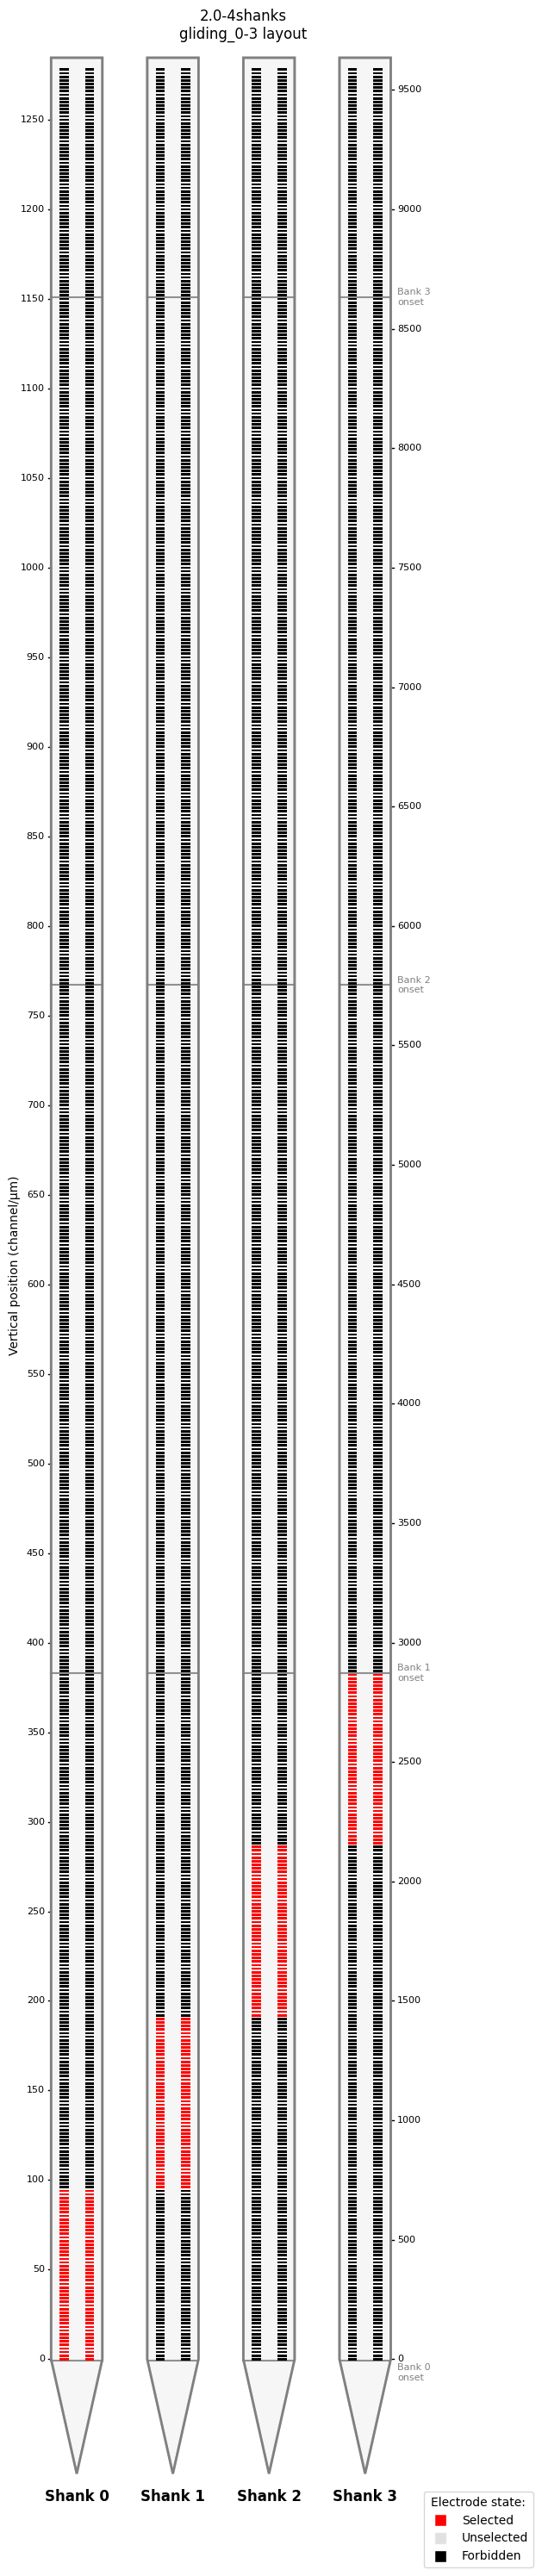

In [ ]:
SAVE_PLOT = False
SAVE_IMRO = False

title = f'{PROBE_TYPE}\n{LAYOUT_PRESET} layout'

# Generate IMRO
imro_list = generate_imro_channelmap(
    probe_type=PROBE_TYPE,
    layout_preset=LAYOUT_PRESET,
    reference_id=REFERENCE_ID,
    probe_subtype=SPECIFIC_TYPE,
    custom_electrodes=CUSTOM_ELECTRODES,
    wiring_file=wiring_file,
    ap_gain=AP_GAIN,
    lf_gain=LF_GAIN,
    hp_filter=HP_FILTER
)

# save to file
if SAVE_IMRO:
    save_to_imro_file(imro_list, "imro_files/" + title)

# plot and save IMRO layout
plot_probe_layout(PROBE_TYPE,
                    imro_list,# + imro_list[-50:],
                    positions_file,
                    wiring_file,
                    title,
                    save_plot = SAVE_PLOT)